Loading Libraries and Data

In [2]:
import pickle
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA
from collections import *
from scipy.signal import butter, filtfilt
from collections import Counter
import seaborn as sns
import scipy.signal as signal
from scipy.spatial.distance import cityblock
from sklearn.cluster import AgglomerativeClustering, KMeansa
from sklearn.preprocessing import StandardScaler
import matplotlib.backends.backend_pdf
import math

file = open(r"C:\Users\Mahmoud Al-Madi\Desktop\BCM_SIDS_ML_Summer_22\Data\trials_breath1.obj", "rb")
trials_breath = pickle.load(file)
file = open(r"C:\Users\Mahmoud Al-Madi\Desktop\BCM_SIDS_ML_Summer_22\Data\static_data.obj", "rb")
static_data = pickle.load(file)
file = open(r"C:\Users\Mahmoud Al-Madi\Desktop\BCM_SIDS_ML_Summer_22\Data\trials_raw1.obj", "rb")
trials_raw = pickle.load(file)
metadata = pd.read_csv(r"C:\Users\Mahmoud Al-Madi\Desktop\BCM_SIDS_ML_Summer_22\Data\d2k project metadata.csv")

Fourier Transfrom of Signal

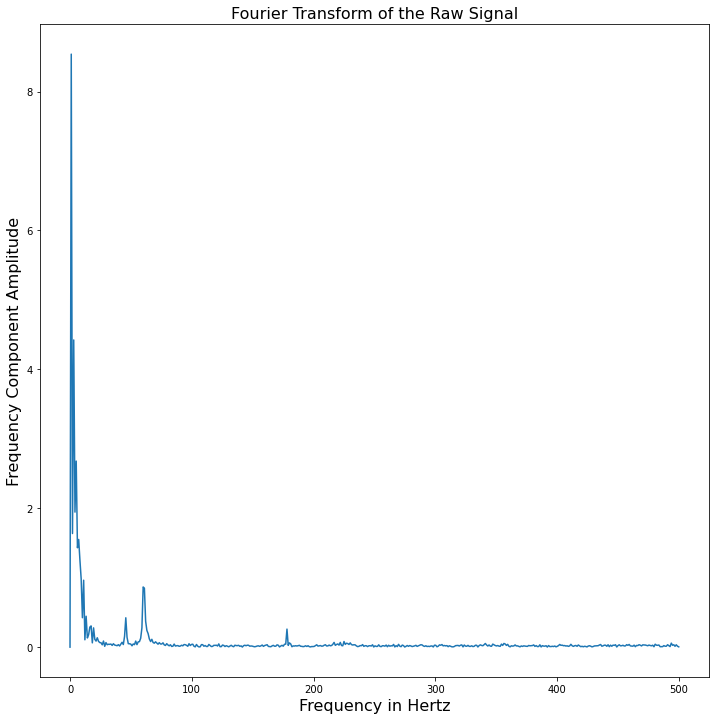

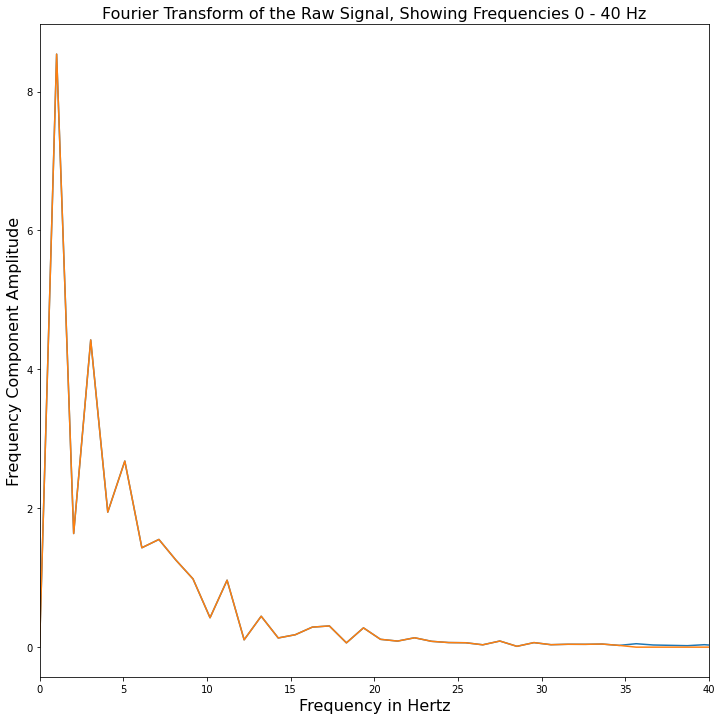

[-0.0117889  -0.01164557 -0.0115061  -0.01137106 -0.01124086 -0.0111158
 -0.01099619 -0.01088234 -0.01077459 -0.01067349]
[0.         1.01832994 2.03665988 3.05498982 4.07331976 5.09164969
 6.10997963 7.12830957 8.14663951 9.16496945]


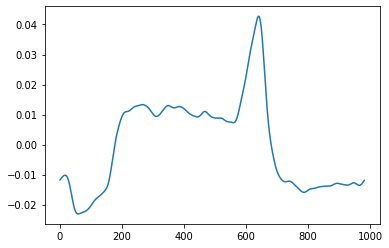

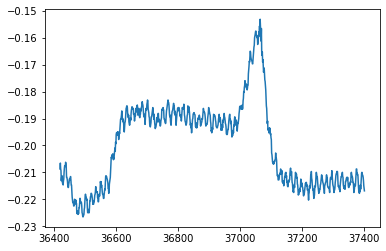

In [3]:
from scipy.fft import rfft, rfftfreq

# Number of samples in normalized_tone
N = (37.402 - 36.420) * 1000
SAMPLE_RATE = 1000

signal = np.array(trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603]) - np.mean(trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603])

yf = rfft(signal)
xf = rfftfreq(math.ceil(N), 1 / SAMPLE_RATE)
plt.figure(figsize = (12,12))
plt.plot(xf, np.abs(yf))
plt.xlabel('Frequency in Hertz', size= 16)
plt.ylabel("Frequency Component Amplitude", size= 16)
plt.title("Fourier Transform of the Raw Signal", size= 16)

plt.figure(figsize = (12,12))
plt.plot(xf, np.abs(yf))
plt.xlim(0,40)
plt.xlabel('Frequency in Hertz', size= 16)
plt.ylabel("Frequency Component Amplitude", size= 16)
plt.title("Fourier Transform of the Raw Signal, Showing Frequencies 0 - 40 Hz", size= 16)

len(yf)

yf[35:] = 0

plt.plot(xf, np.abs(yf))
plt.show()

from scipy.fft import irfft

new_sig = irfft(yf)
print(new_sig[:10])
print(xf[:10])
plt.plot(new_sig[:1000])
plt.show()
plt.figure()
plt.plot(trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603])

Filtering Functions

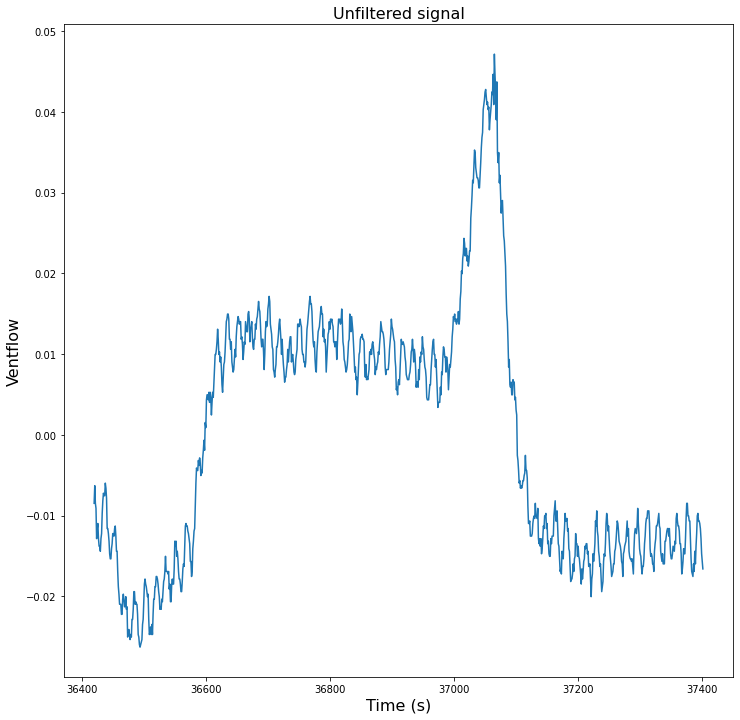

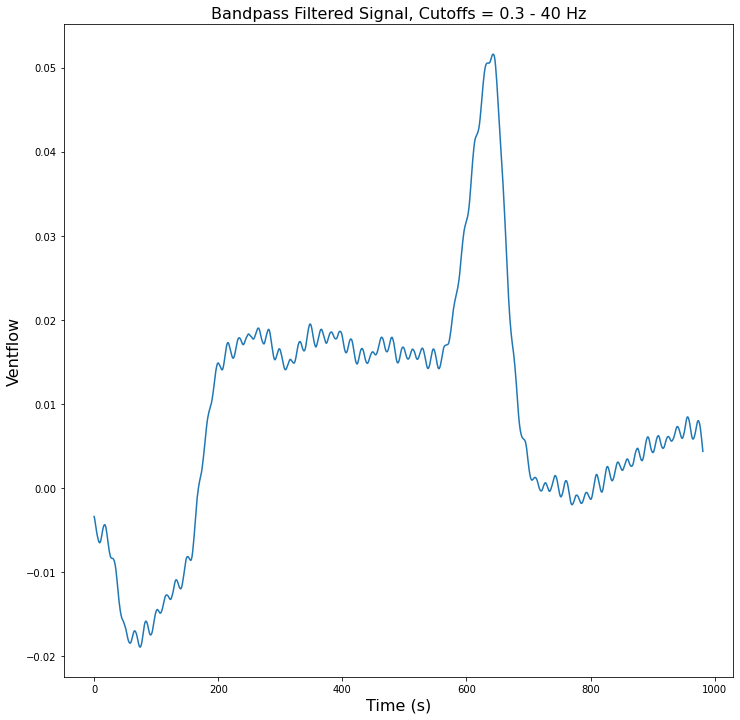

In [4]:
from scipy.signal import butter, filtfilt

def butter_lowpass(lowcutoff, highcutoff, fs, order=5):
        nyq = 0.5 * fs
        lowcutoff = lowcutoff / nyq        
        highcutoff = highcutoff / nyq
        a,b = butter(order, [lowcutoff, highcutoff], analog=False, btype='bandpass',output = 'ba')
        return a,b

def butter_bandpass_filter(data, lowcutoff, highcutoff, fs, order=5):
        a,b = butter_lowpass(lowcutoff, highcutoff, fs, order=order)
        y = filtfilt(a,b, data)
        return y

data = trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603] - np.mean(trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603])

def run(data):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 1000.0
    highcutoff = 40
    lowcutoff = 0.3
    plt.figure(figsize = (12,12))
    plt.plot(data, label='Raw signal')
    plt.title("Unfiltered signal", size = 16)
    plt.xlabel("Time (s)", size = 16)
    plt.ylabel("Ventflow", size = 16)

    filtered_data = butter_bandpass_filter(data, lowcutoff, highcutoff, fs, order =1)

    plt.figure(figsize = (12,12))
    plt.plot(filtered_data)
    plt.title("Bandpass Filtered Signal, Cutoffs = {} - {} Hz" .format(lowcutoff , highcutoff), size = 16)
    plt.xlabel("Time (s)", size = 16)
    plt.ylabel("Ventflow", size = 16)

    return filtered_data

filtered_data = run(data)
    

Visualizing Spectrograms

<class 'matplotlib.image.AxesImage'>
(864, 864, 4)
149.09027777777777


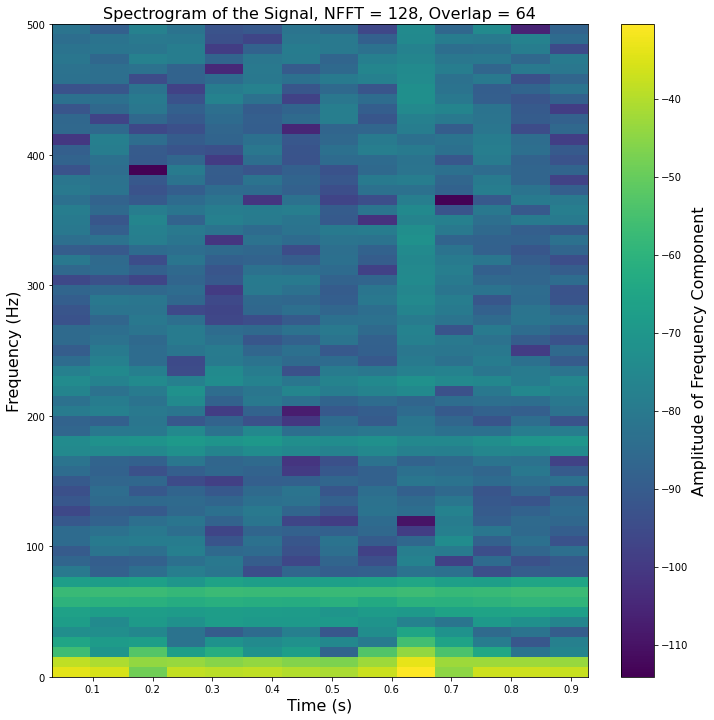

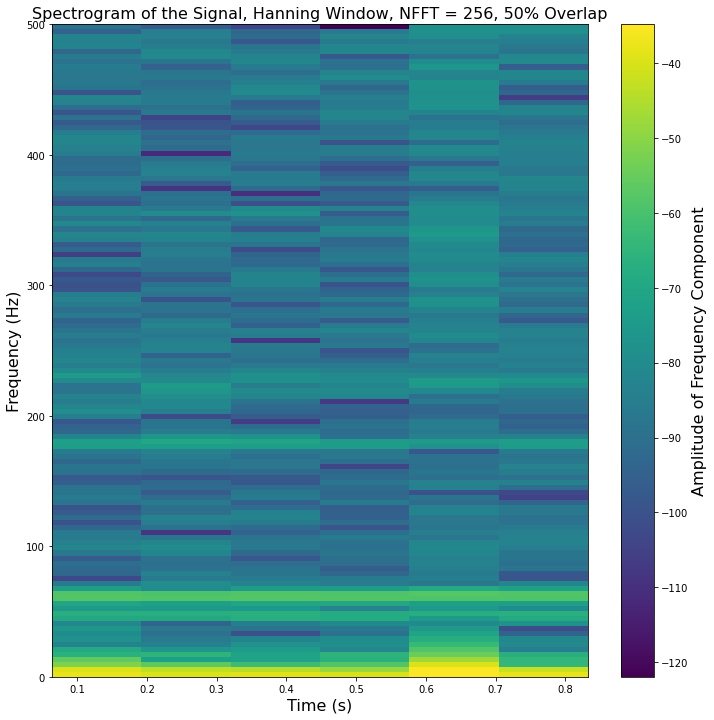

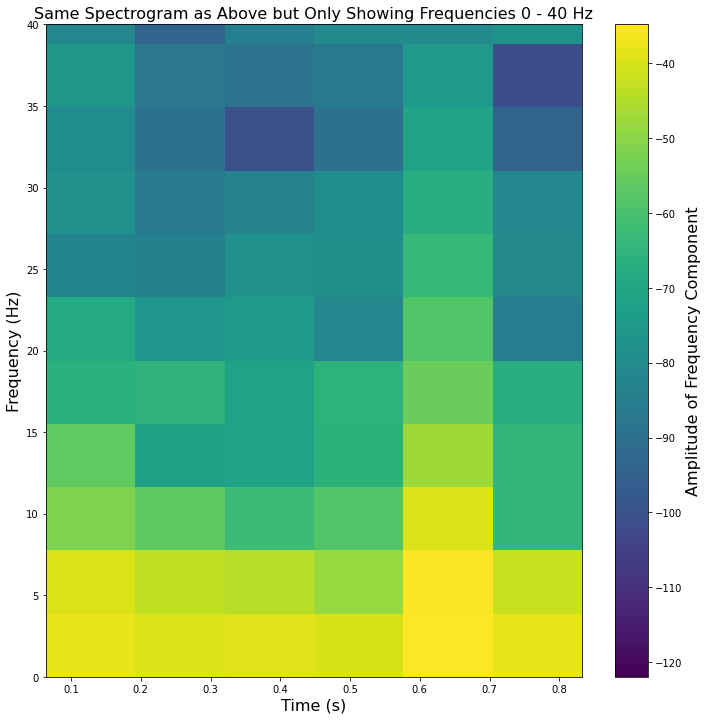

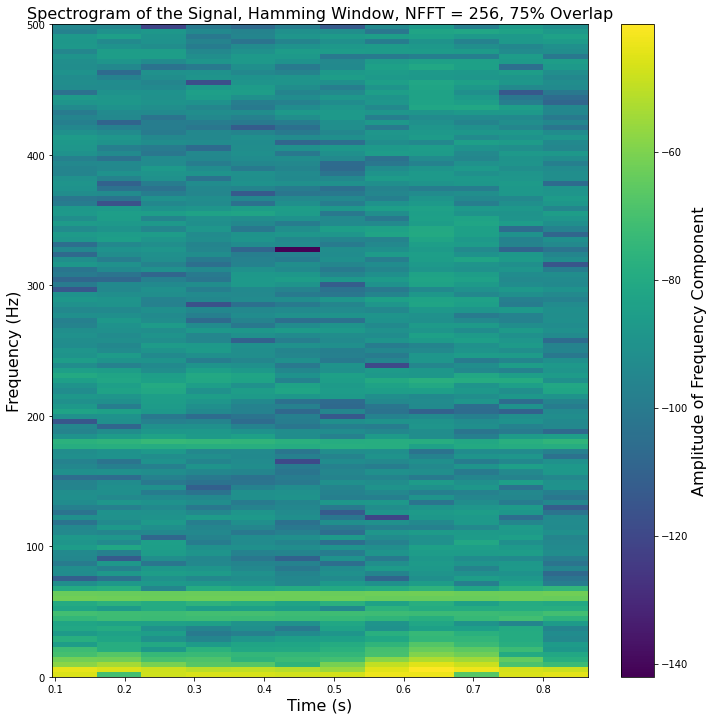

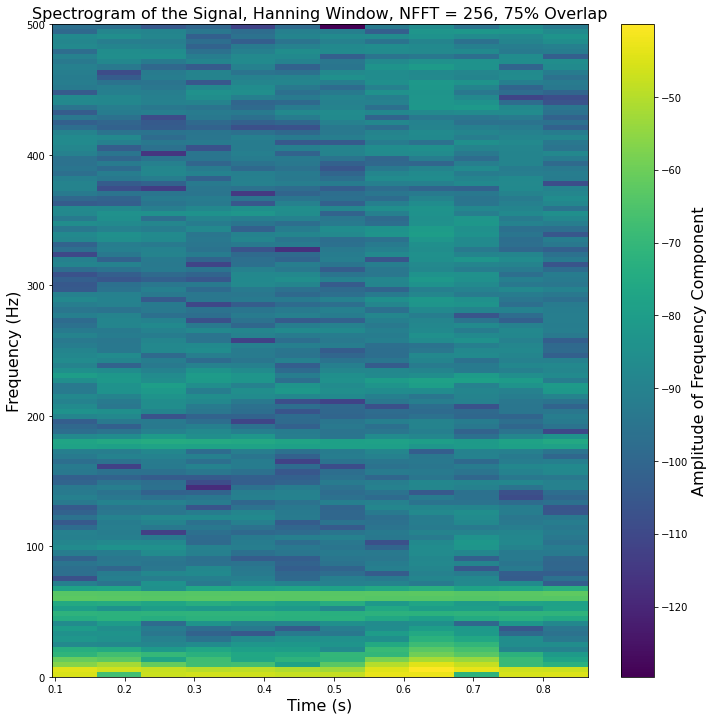

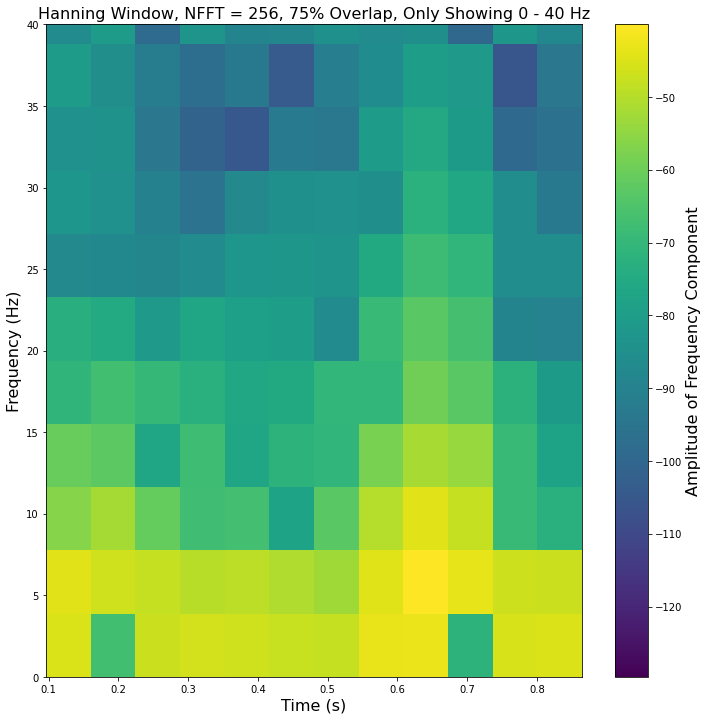

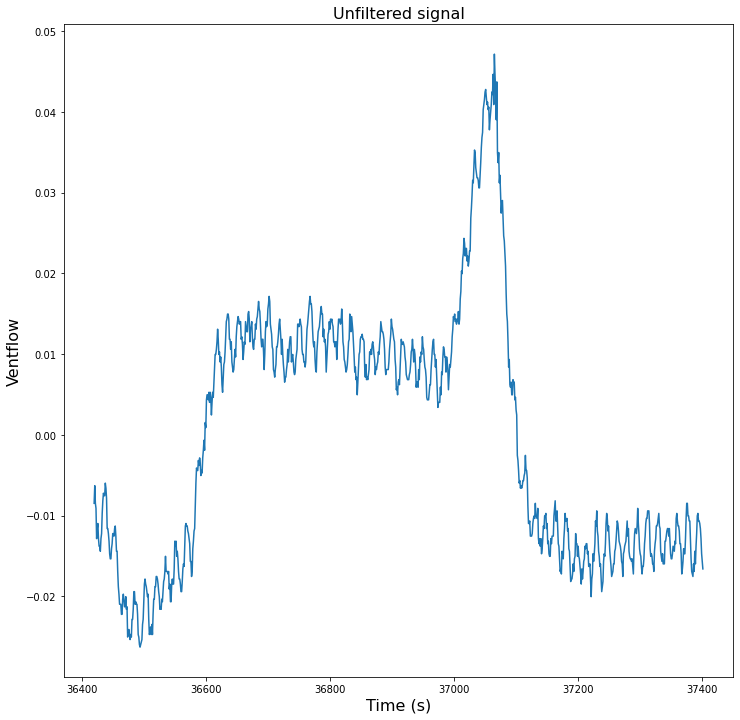

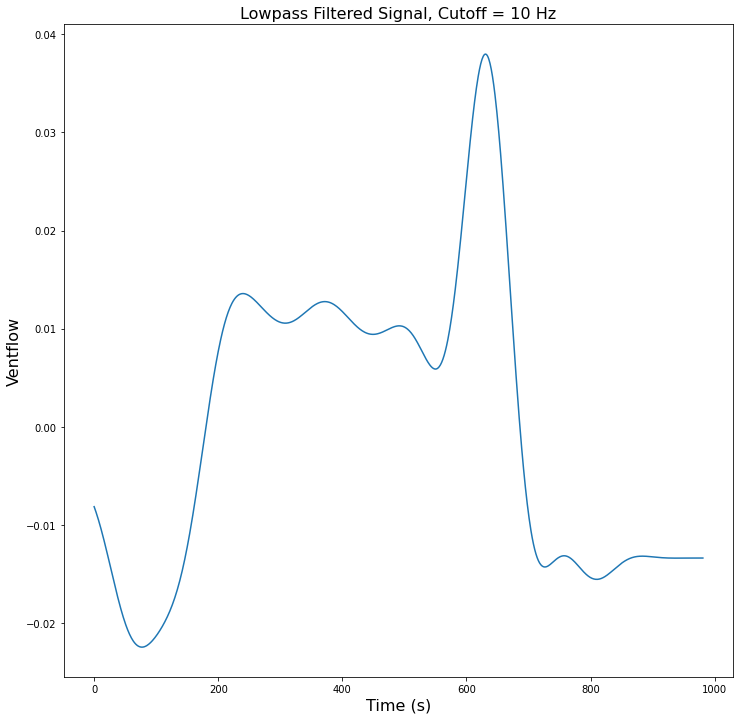

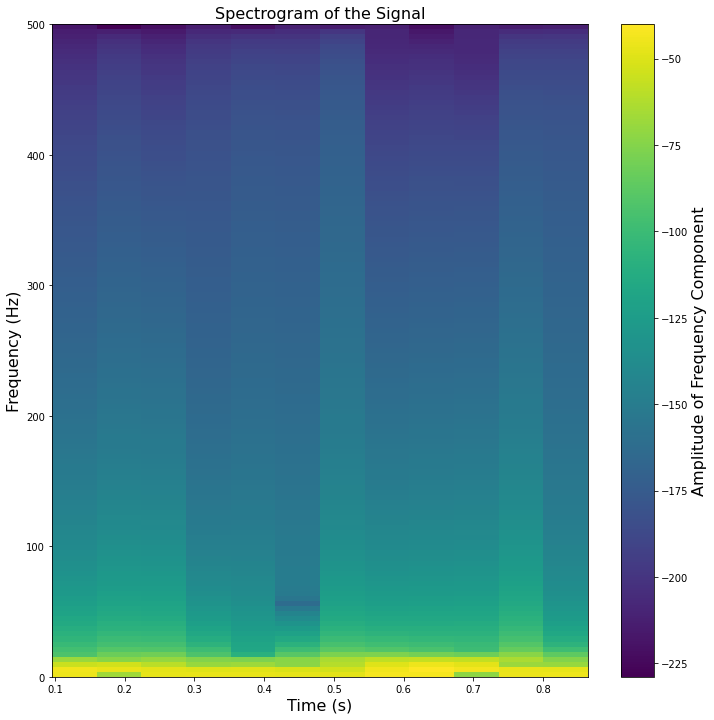

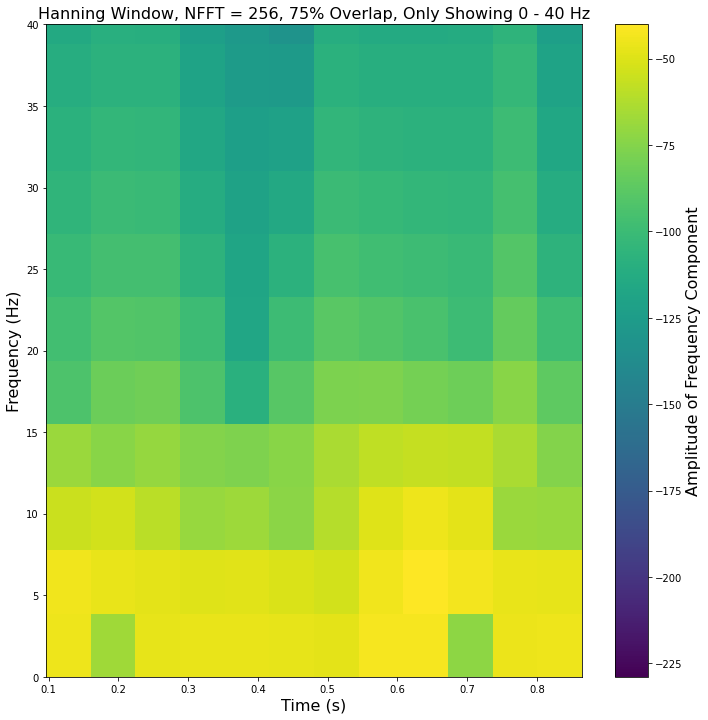

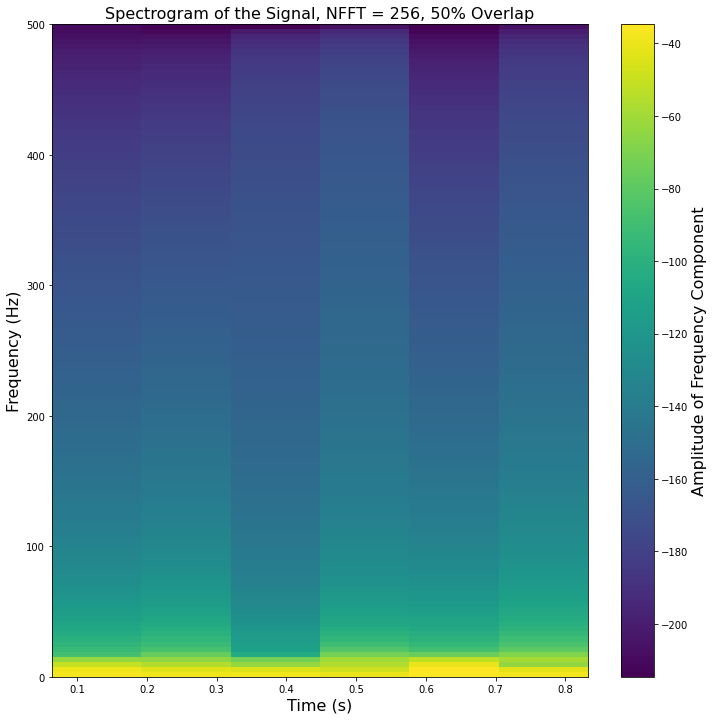

In [68]:
from PIL import Image
import io

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, mode = "magnitude", NFFT = 128, noverlap = 64)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal, NFFT = 128, Overlap = 64", size = 16)


plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, mode = "magnitude", NFFT = 256, noverlap = 128)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal, Hanning Window, NFFT = 256, 50% Overlap", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, mode = "magnitude", NFFT = 256, noverlap = 128)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
plt.ylim(0,40)
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Same Spectrogram as Above but Only Showing Frequencies 0 - 40 Hz", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, window = np.hamming(256), mode = "psd", NFFT = 256, noverlap = 192)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal, Hamming Window, NFFT = 256, 75% Overlap", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, mode = "psd", NFFT = 256, noverlap = 192)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal, Hanning Window, NFFT = 256, 75% Overlap", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(data, Fs = 1000, mode = "psd", NFFT = 256, noverlap = 192)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
plt.ylim(0,40)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Hanning Window, NFFT = 256, 75% Overlap, Only Showing 0 - 40 Hz", size = 16)

data = trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603] - np.mean(trials_raw["M21488"]["raw"]["Breathing_flow_signal"][18621:19603])

filtered_data = run(data)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(filtered_data, Fs = 1000, mode = "psd", NFFT = 256, noverlap = 192)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(filtered_data, Fs = 1000, mode = "psd", NFFT = 256, noverlap = 192)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
plt.ylim(0,40)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Hanning Window, NFFT = 256, 75% Overlap, Only Showing 0 - 40 Hz", size = 16)

plt.figure(figsize = (12,12))
spectrum, freqs, t, im = plt.specgram(filtered_data, Fs = 1000, mode = "magnitude", NFFT = 256, noverlap = 128)
plt.xlabel("Time (s)", size = 16)
plt.ylabel("Frequency (Hz)", size = 16)
cbar = plt.colorbar()
cbar.set_label('Amplitude of Frequency Component', rotation=90, size = 16)
plt.title("Spectrogram of the Signal, NFFT = 256, 50% Overlap", size = 16)

print(type(im))

sp_array = np.asarray(im)

with io.BytesIO() as buffer:
    plt.savefig(buffer, format = "png")
    buffer.seek(0)
    image = Image.open(buffer)
    ar = np.asarray(image)

print(ar.shape)

averaged_ar = np.average(ar, axis = 2)

print(np.average(averaged_ar[:,160]))